In [1]:
from rdcanon import util
import pandas as pd
from rdkit import RDLogger
import numpy as np
import random

RDLogger.DisableLog('rdApp.*')                                                                                                                                                           

pubchem_substruct_match_experiments = pd.read_excel(
    "data/pubchem_non_matching_substruct_dataset_20240108.xlsx"
)

drugbank_substruct_match_experiments = pd.read_excel(
    "data/drugbank_non_matching_substruct_dataset_20240108.xlsx"
)

atlas_substruct_match_experiments = pd.read_excel(
    "data/npatlas_non_matching_substruct_dataset_20240108.xlsx"
)

def split_into_n_exps(df, n):
    random.seed(42)
    experiment_index = []
    for i in range(n):
        experiment_index += [i] * (len(df) // n)
    while len(experiment_index) < len(df):
        experiment_index.append(n - 1)
    random.shuffle(experiment_index)  # Randomly shuffle the values
    df["experiment"] = experiment_index


In [10]:
split_into_n_exps(pubchem_substruct_match_experiments, 5)

experiments = pubchem_substruct_match_experiments.groupby(["experiment"])

pubchem_matching = []
pubchem_non_matching = []
pubchem_random = []
for experiment in experiments:
    experiment_name = experiment[0]
    experiment_data = experiment[1]
    print(len(experiment_data))

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["matching_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    pubchem_matching.append(times)
    print(times)

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["non_matching_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    pubchem_non_matching.append(times)
    print(times)

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["random_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    pubchem_random.append(times)
    print(times)

1720
[6.27512999999999, 5.8646819999999025, 5.772981999999956, 5.997278000000051]
[4.628697999999986, 3.99971000000005, 4.058855999999878, 4.061516999999867]
[5.175152999999909, 4.454583000000184, 4.47438800000009, 4.495710000000145]
1720
[5.941931000000068, 5.500119000000041, 5.8695009999999, 6.042236000000003]
[4.692483999999922, 4.08480499999996, 4.0460259999999835, 4.130553999999847]
[4.886563000000024, 4.308036000000129, 4.2962250000000495, 4.651822999999922]
1720
[6.123781999999892, 5.615276999999878, 5.75281700000005, 6.0017290000000685]
[4.545415000000048, 3.886587999999847, 4.022971999999982, 4.01298799999995]
[4.938607000000047, 4.368723000000045, 4.170458000000053, 4.497085000000197]
1720
[5.8662389999999505, 5.627811999999949, 5.979031000000077, 6.361116999999922]
[4.423575000000028, 4.046902999999929, 4.0275180000001, 4.152031999999963]
[4.761786999999913, 4.211095999999998, 4.17451200000005, 4.347713999999996]
1724
[5.885695999999825, 5.7877790000000005, 5.919405999999981

6.018555599999945 5.6791337999999545 5.858747399999993 6.038363800000025


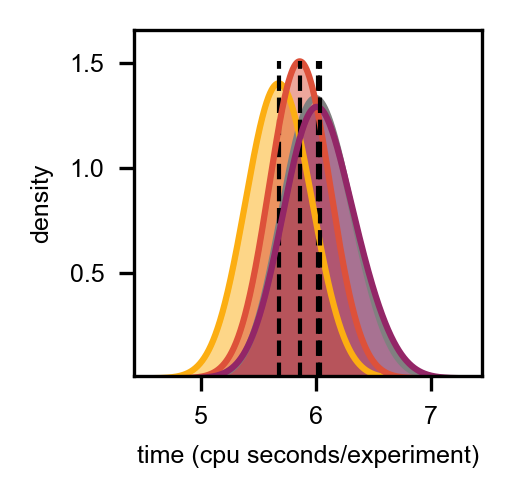

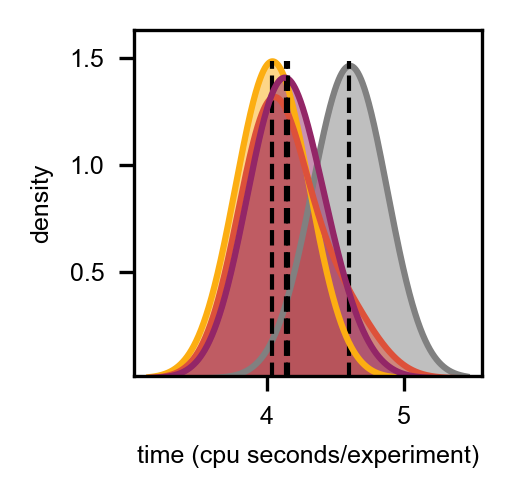

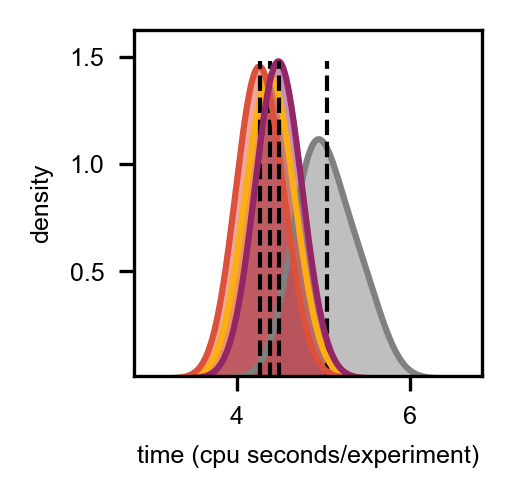

In [11]:
data = np.array(pubchem_matching).T
print(np.mean(data[0,:]), np.mean(data[1,:]), np.mean(data[2,:]), np.mean(data[3,:]))

util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=1.1, bandwidth=.25, figsize=(1.5, 1.5), title="figures/pubchem_matching.png")
data = np.array(pubchem_non_matching).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=0.9, bandwidth=.25, figsize=(1.5, 1.5), title="figures/pubchem_non_matching.png")
data = np.array(pubchem_random).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=0.9, bandwidth=.25, figsize=(1.5, 1.5), title="figures/pubchem_random.png")

In [4]:
split_into_n_exps(drugbank_substruct_match_experiments, 5)

experiments = drugbank_substruct_match_experiments.groupby(["experiment"])

drugbank_matching = []
drugbank_non_matching = []
drugbank_random = []
for experiment in experiments:
    experiment_name = experiment[0]
    experiment_data = experiment[1]
    print(len(experiment_data))

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["matching_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    drugbank_matching.append(times)
    print(times)

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["non_matching_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    drugbank_non_matching.append(times)
    print(times)

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["random_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    drugbank_random.append(times)
    print(times)

1732
[7.101978999999972, 7.049734999999998, 6.312022000000013, 6.5560709999999744]
[5.851598999999965, 4.647487999999953, 4.694007999999997, 4.9929369999999835]
[5.4235610000000065, 4.551491999999996, 5.202912999999967, 5.453436999999951]
1732
[6.985239999999976, 6.515244999999936, 6.4764359999999215, 6.638283999999999]
[5.7508960000000116, 5.080539000000044, 5.03773799999999, 4.992741999999907]
[5.1932709999999815, 4.794749000000024, 4.518967999999973, 4.847876999999926]
1732
[6.837544999999977, 6.198971000000029, 6.251224999999977, 6.627385000000004]
[6.126573000000008, 4.745292000000063, 4.7542649999999185, 5.383338999999978]
[5.125958999999966, 4.344064000000003, 4.3631110000000035, 4.54712399999994]
1732
[6.55480399999999, 6.313027000000034, 6.160935999999992, 6.2726860000000215]
[5.602134999999976, 4.560631000000058, 4.608793999999989, 5.236553000000072]
[5.317568999999935, 4.4591930000000275, 4.494866000000002, 4.8239580000000615]
1736
[6.66538300000002, 6.04860999999994, 6.1957

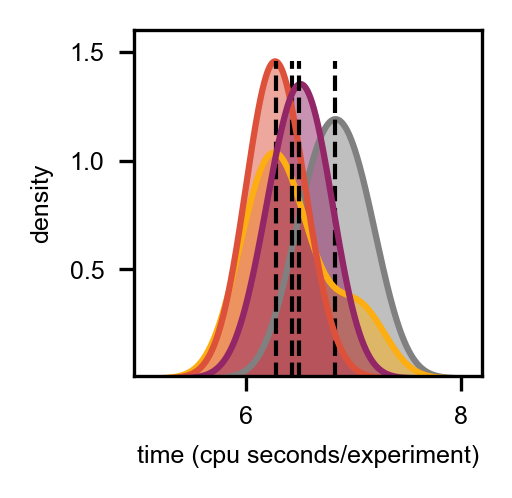

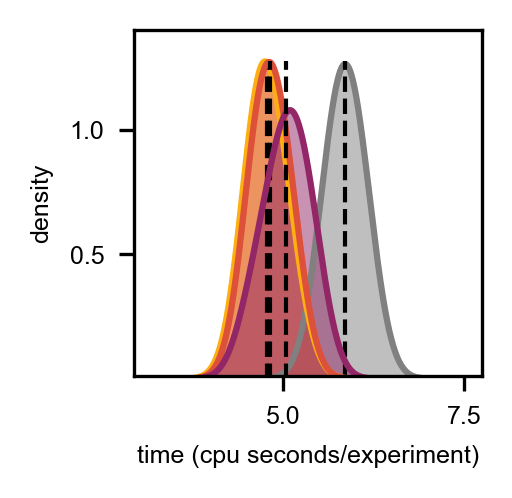

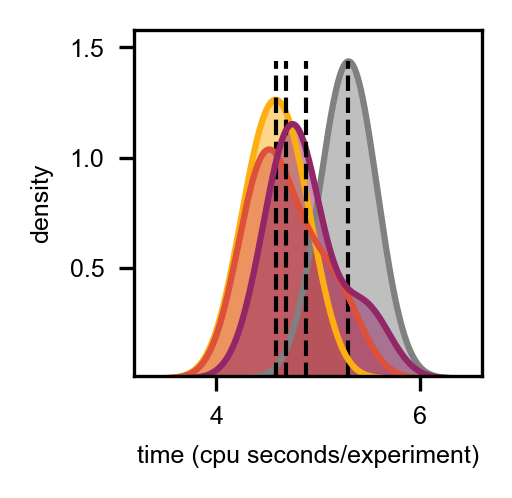

In [5]:
data = np.array(drugbank_matching).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=0.9, bandwidth=.25, figsize=(1.5, 1.5), title="figures/drugbank_matching.png")
data = np.array(drugbank_non_matching).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=0.9, bandwidth=.25, figsize=(1.5, 1.5), title="figures/drugbank_non_matching.png")
data = np.array(drugbank_random).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=0.9, bandwidth=.25, figsize=(1.5, 1.5), title="figures/drugbank_random.png")

In [6]:
split_into_n_exps(atlas_substruct_match_experiments, 5)

experiments = atlas_substruct_match_experiments.groupby(["experiment"])

atlas_matching = []
atlas_non_matching = []
atlas_random = []
for experiment in experiments:
    experiment_name = experiment[0]
    experiment_data = experiment[1]
    print(len(experiment_data))

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["matching_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    print(times)
    atlas_matching.append(times)

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["non_matching_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    print(times)
    atlas_non_matching.append(times)

    times = util.time_compare_substruct_match(
        experiment_data["query_smarts"].to_numpy(),
        experiment_data["random_substrate_smiles"].to_numpy(),
        embeddings=["pubchem", "drugbank", "npatlas"],
        iters=1000
    )
    print(times)
    atlas_random.append(times)

1156
[4.97384999999997, 4.871878000000038, 4.68572800000004, 4.6842889999999215]
[4.577450999999996, 3.944437000000107, 3.361464999999953, 3.8062400000000025]
[4.542544000000021, 3.2953520000000935, 3.337837000000036, 3.367772999999943]
1156
[4.717970000000037, 4.511167999999998, 4.350613000000067, 4.416268999999943]
[4.150537999999983, 3.411452000000054, 3.310077999999976, 3.790571]
[4.475870999999984, 3.823383999999919, 3.6950890000000527, 3.728364000000056]
1156
[4.697512999999958, 4.075199999999995, 4.3298520000000735, 4.180859000000055]
[4.107242999999926, 3.131752000000006, 3.2268450000001394, 3.4982310000000325]
[4.62935299999981, 3.6517780000001494, 3.5832880000000387, 3.819495000000188]
1156
[4.697022999999945, 4.069580000000087, 4.343016000000034, 4.2672439999998915]
[4.266208000000006, 3.526553000000149, 3.305184000000054, 3.4347899999997935]
[4.466809000000012, 3.6285179999999855, 3.3438930000002074, 3.4155430000000706]
1157
[4.521160000000009, 3.8871469999999135, 3.9908889

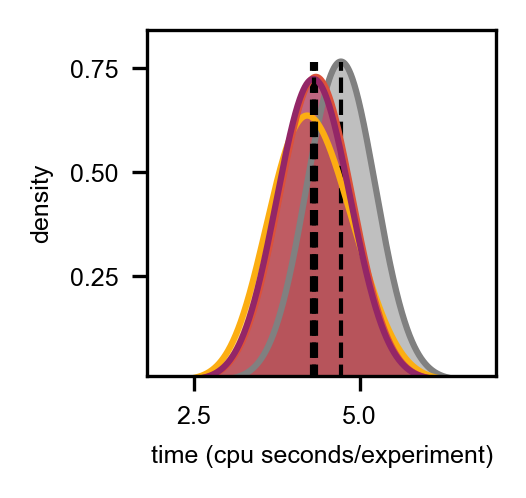

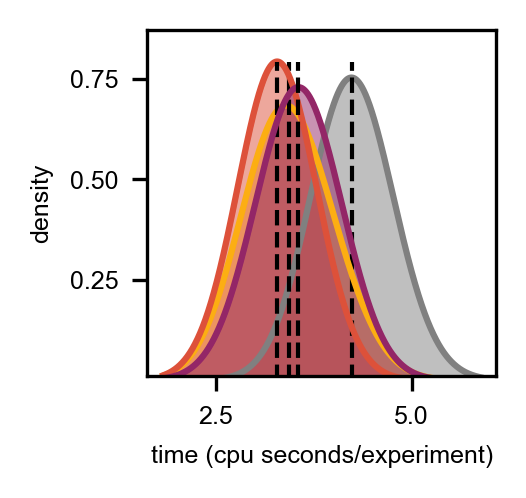

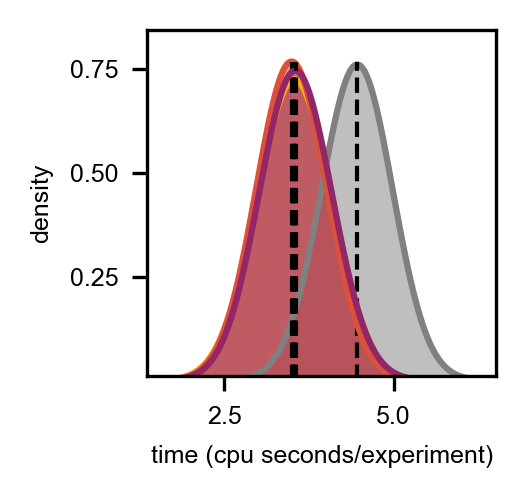

In [7]:
data = np.array(atlas_matching).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=1.7, bandwidth=.5, figsize=(1.5, 1.5), title="figures/atlas_matching.png")
data = np.array(atlas_non_matching).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=0.9, bandwidth=.5, figsize=(1.5, 1.5), title="figures/atlas_non_matching.png")
data = np.array(atlas_random).T
util.plot_kde(data, ["grey", "#fcae12", "#dd513a", "#932667"], padding_percent=1.2, bandwidth=.5, figsize=(1.5, 1.5), title="figures/atlas_random.png")